# EQUITY FLOAT LOOKBACK

Valuation and Risk of Equity Float Lookback Options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  22 Sep 2020 at 22:40 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



# Fixed Lookback Option

I create a fixed lookback call and put option

In [3]:
expiryDate = FinDate(1, 1, 2021)

In [20]:
strikePrice = 105.0

In [21]:
optionTypeCall = FinOptionTypes.EUROPEAN_CALL
optionTypePut = FinOptionTypes.EUROPEAN_PUT

In [22]:
lookbackCall = FinEquityFloatLookbackOption(expiryDate, optionTypeCall)
lookbackPut = FinEquityFloatLookbackOption(expiryDate, optionTypePut)

In [23]:
print(lookbackCall)

OBJECT TYPE: FinEquityFloatLookbackOption
EXPIRY DATE: FRI 01 JAN 2021
OPTION TYPE: FinOptionTypes.EUROPEAN_CALL


In [24]:
print(lookbackPut)

OBJECT TYPE: FinEquityFloatLookbackOption
EXPIRY DATE: FRI 01 JAN 2021
OPTION TYPE: FinOptionTypes.EUROPEAN_PUT


## Valuation

In [25]:
valueDate = FinDate(1, 1, 2020)

In [26]:
interestRate = 0.10

In [27]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [28]:
dividendYield = 0.0

In [29]:
volatility = 0.10

In [30]:
numPaths = 2000
numStepsPerYear = 1000

In [31]:
stockPrices = np.linspace(50, 150, 20)

In [32]:
values = []
valuesMC = []

for stockPrice in stockPrices:
    stockMinMax = stockPrice
    v = lookbackCall.value(valueDate, stockPrice, discountCurve, dividendYield,
                           volatility, stockMinMax)
    v_mc = lookbackCall.valueMC(valueDate, stockPrice, discountCurve, dividendYield, 
                                volatility, stockMinMax, numPaths, numStepsPerYear)
    values.append(v)
    valuesMC.append(v_mc)

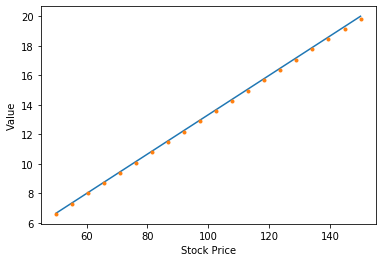

In [33]:
plt.plot(stockPrices, values)
plt.plot(stockPrices, valuesMC, '.')
plt.xlabel("Stock Price")
plt.ylabel("Value");

In [34]:
values = []
valuesMC = []

for stockPrice in stockPrices:
    stockMinMax = stockPrice
    v = lookbackPut.value(valueDate, stockPrice, discountCurve, dividendYield,
                           volatility, stockMinMax)
    v_mc = lookbackPut.valueMC(valueDate, stockPrice, discountCurve, dividendYield, 
                                volatility, stockMinMax, numPaths, numStepsPerYear)
    values.append(v)
    valuesMC.append(v_mc)

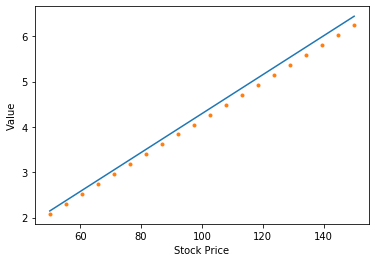

In [35]:
plt.plot(stockPrices, values)
plt.plot(stockPrices, valuesMC, '.')
plt.xlabel("Stock Price")
plt.ylabel("Value");

Copyright (c) 2020 Dominic O'Kane